# Computation of LogDet by Stochastic Chebyshev Approximations

In [1]:
%pylab inline
import tensorflow as tf
import sys
sys.path.insert(0,'..')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from spectralflow.logdet import chebyshev_logdet


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [35]:
tf.reset_default_graph()

# Let's create a random matrix and use it to define an
# implicit operator
A = tf.orthogonal_initializer()(shape=[32,32])
A = tf.matmul(A, tf.transpose(A)) + 5*tf.eye(32)

def op(x):
    return tf.tensordot(x, A, axes=[[-1],[-1]])
with tf.variable_scope('cheby', reuse=tf.AUTO_REUSE):
    logdet = chebyshev_logdet(op, shape=[128, 32], deg=50)
    
# Get true value
_, tld = tf.linalg.slogdet(A)

In [36]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [37]:
estim, true = sess.run([logdet, tld])

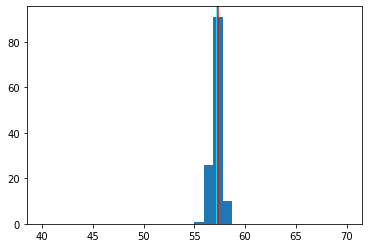

In [39]:
hist(estim,32,range=[40,70]);
axvline(mean(estim),color='cyan')
axvline(true,color='red')

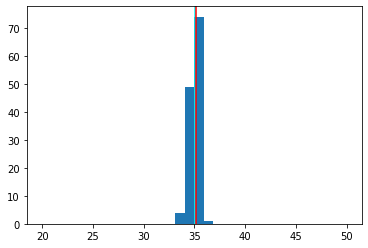

In [34]:
hist(estim,32,range=[20,50]);
axvline(mean(estim),color='cyan')
axvline(true,color='red')

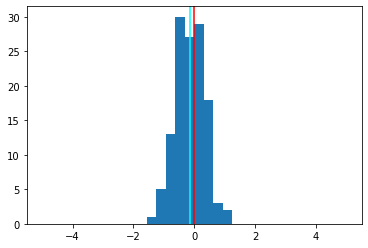

In [16]:
hist(estim,32,range=[-5,5]);
axvline(mean(estim),color='cyan')
axvline(true,color='red')